In [ ]:
# @title Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

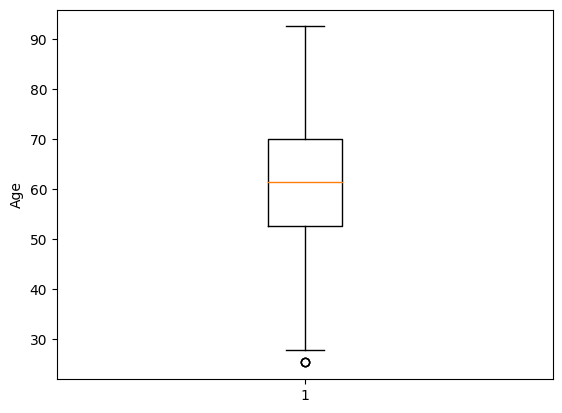

           age      height      weight
0    64.038707  163.791795   74.565294
1    53.518643  186.005573   93.784553
3    92.438219  200.568930  113.814633
4    39.456737  179.391274   77.562357
5    49.520332  174.102367   92.193848
..         ...         ...         ...
145  36.087855  192.669769   77.300172
146  70.453956  170.626017   75.621063
147  66.022608  153.861977   95.790444
148  56.723037  145.962111   80.689105
149  54.213848  176.749704   79.583469

[147 rows x 3 columns]


In [6]:
# @title Generating Data

# Set random seed
np.random.seed(124)

# Creating the dataframe
age = np.random.normal(loc=60, scale=14, size=150)
height = np.random.normal(loc=175, scale=20, size=150)
weight = np.random.normal(loc=90, scale=13, size=150)
data = pd.DataFrame({'age': age, 'height': height, 'weight': weight})

# Assigning missing data
data.iloc[2, 0] = np.nan
data.iloc[10, 1] = np.nan
data.iloc[20, 2] = np.nan
data.iloc[30, 0] = np.nan
data.iloc[40, 1] = np.nan

# Identifying missing data and replacing them with mode of the column
for col in data.columns:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)

# Detecting outlier data in the age column using the boxplot method
fig, ax = plt.subplots()
ax.boxplot(data['age'])
ax.set_ylabel('Age')
plt.show()

# Removing the corresponding row with outlier age data from the dataframe
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_up = q3 + 1.5 * iqr
outlier_threshold_down = q1 - 1.5 * iqr
data = data[data['age'] <= outlier_threshold_up]
data = data[data['age'] >= outlier_threshold_down]

# Print the cleaned data
print(data)